NOTE: This notebook is used to do various analysis, EDA and try out different models and finally choose the one which gives good results.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# to supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# function to find root mean squared error
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [3]:
data = pd.read_csv("../dataset/fetal_birth_weight.dat")

In [4]:
data.head()

,birth_weight,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0


In [5]:
data['birth_weight'] = np.round(data['birth_weight']/35.274,3)
data['weight'] = np.round(data['weight']/2.2046,3)
data.head()

,birth_weight,gestation,parity,age,height,weight,smoke
0,3.402,284,0,27,62,45.360,0
1,3.203,282,0,33,64,61.236,0
2,3.629,279,0,28,64,52.164,1
3,3.062,282,0,23,67,56.700,1
4,3.856,286,0,25,62,42.185,0


### Information about dataset
* target: birth_weight (in kgs)
* gestation (in days)
* parity (1 if first born else 0)
* age (mother's age in years)
* height (mother's height in inches)
* weight (mother's weight in kgs during pregnancy)
* smoke (whether the mother smokes or not 1 = yes and 0 = no)

Dataset Source: http://people.reed.edu/~jones/141/BirthWgt.html

In [6]:
data.describe()

,birth_weight,gestation,parity,age,height,weight,smoke
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,3.386701,279.101363,0.262351,27.228279,64.049404,58.277687,0.390971
std,0.519596,16.010305,0.440100,5.817839,2.526102,9.405013,0.488176
min,1.559000,148.000000,0.000000,15.000000,53.000000,39.463000,0.000000
25%,3.062000,272.000000,0.000000,23.000000,62.000000,51.823500,0.000000
50%,3.402000,280.000000,0.000000,26.000000,64.000000,56.700000,0.000000
75%,3.714000,288.000000,1.000000,31.000000,66.000000,63.050000,1.000000
max,4.990000,353.000000,1.000000,45.000000,72.000000,113.399000,1.000000


In [7]:
data.isnull().sum()

birth_weight    0
gestation       0
parity          0
age             0
height          0
weight          0
smoke           0
dtype: int64

In [8]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [9]:
X

,gestation,parity,age,height,weight,smoke
0,284,0,27,62,45.360,0
1,282,0,33,64,61.236,0
2,279,0,28,64,52.164,1
3,282,0,23,67,56.700,1
4,286,0,25,62,42.185,0
...,...,...,...,...,...,...
1169,275,1,27,60,45.360,0
1170,265,0,24,67,54.432,0
1171,291,0,30,65,68.040,1
1172,281,1,21,65,49.896,0


In [10]:
y

0       3.402
1       3.203
2       3.629
3       3.062
4       3.856
        ...  
1169    3.203
1170    3.629
1171    3.685
1172    3.544
1173    3.317
Name: birth_weight, Length: 1174, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 11)

### Baseline Models (Mean and kNN)

#### Baseline Model 1 : Mean

In [12]:
class MeanRegressor:
    
    def __init__(self):
        self.mean = None  # to store mean
    
    def fit(self,X,y):
        self.mean = np.round(np.mean(y),3)
        
    def predict(self,X):
        dim = X.shape[0]
        y_pred = [self.mean for i in range(dim)]
        y_pred = np.array(y_pred)
        return y_pred

In [13]:
mr = MeanRegressor()
mr.fit(X_train,y_train)
y_pred_mr_test = mr.predict(X_test)
y_pred_mr_train = mr.predict(X_train)
mr_rmse_test = rmse(y_test,y_pred_mr_test)
mr_rmse_train = rmse(y_train,y_pred_mr_train)
print("RMSE for Train Set:",mr_rmse_train)
print("RMSE for Test Set:",mr_rmse_test)

RMSE for Train Set: 0.5170415465730467
RMSE for Test Set: 0.5323604297077723


#### Baseline Model 2 : kNN

In [14]:
X_sc = StandardScaler().fit_transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_sc,y,test_size=0.15,random_state=11)

With Standard Scaler

In [15]:
knn = KNeighborsRegressor()
knn.fit(Xtrain,ytrain)
y_pred_knn_test = knn.predict(Xtest)
y_pred_knn_train = knn.predict(Xtrain)
knn_rmse_test = rmse(ytest,y_pred_knn_test)
knn_rmse_train = rmse(ytrain,y_pred_knn_train)
print("RMSE for Train Set:",knn_rmse_train)
print("RMSE for Test Set:",knn_rmse_test)

RMSE for Train Set: 0.3985684397987513
RMSE for Test Set: 0.5058459592240279


### Let's do some EDA

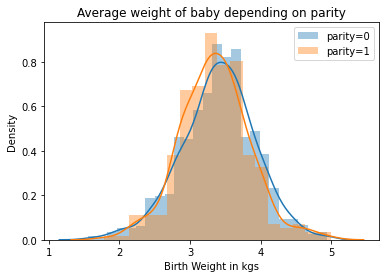

In [15]:
# relationship between input variable and output variable
sns.distplot(data[data['parity'] == 0]['birth_weight'],label="parity=0")
sns.distplot(data[data['parity'] == 1]['birth_weight'],label="parity=1")
plt.title("Average weight of baby depending on parity")
plt.xlabel("Birth Weight in kgs")
plt.legend()
plt.show()

Insight: First born child has a little lower birth weight as compared to child born after first child.

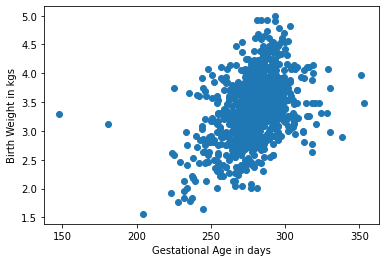

In [16]:
plt.scatter(data['gestation'],data['birth_weight'])
plt.xlabel("Gestational Age in days")
plt.ylabel("Birth Weight in kgs")
plt.show()

Insight: It is quite obvious that as gestational age increases then birth weight also increases.

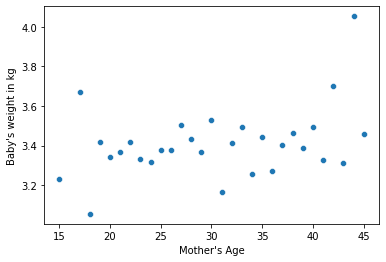

In [17]:
sns.scatterplot(x=data.groupby('age').mean()['birth_weight'].index,y=data.groupby('age').mean()['birth_weight'])
plt.xlabel("Mother's Age")
plt.ylabel("Baby's weight in kg")
plt.show()

Insight: Baby after 42 age and before 20 years of age is risky

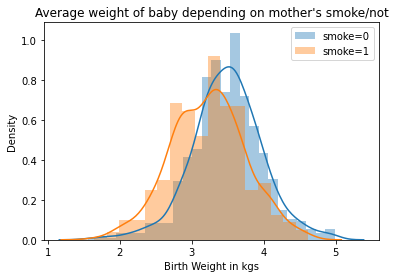

In [18]:
# relationship between input variable and output variable
sns.distplot(data[data['smoke'] == 0]['birth_weight'],label="smoke=0")
sns.distplot(data[data['smoke'] == 1]['birth_weight'],label="smoke=1")
plt.title("Average weight of baby depending on mother's smoke/not")
plt.xlabel("Birth Weight in kgs")
plt.legend()
plt.show()

NOTE: Usually smokers mothers have lower weight babies

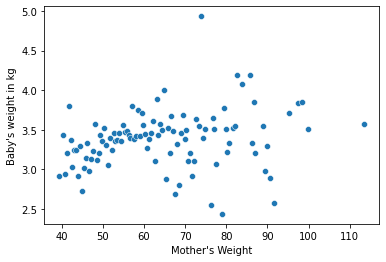

In [19]:
sns.scatterplot(x=data.groupby('weight').mean()['birth_weight'].index,y=data.groupby('weight').mean()['birth_weight'])
plt.xlabel("Mother's Weight")
plt.ylabel("Baby's weight in kg")
plt.show()

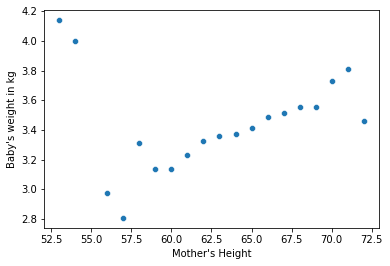

In [20]:
sns.scatterplot(x=data.groupby('height').mean()['birth_weight'].index,y=data.groupby('height').mean()['birth_weight'])
plt.xlabel("Mother's Height")
plt.ylabel("Baby's weight in kg")
plt.show()

### Trying with Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr_test = np.apply_along_axis((lambda x:np.round(x,3)),arr=lr.predict(X_test),axis=0)
y_pred_lr_train = np.apply_along_axis((lambda x:np.round(x,3)),arr=lr.predict(X_train),axis=0)
lr_rmse_test = rmse(y_test,y_pred_lr_test)
lr_rmse_train = rmse(y_train,y_pred_lr_train)
print("RMSE for Train Set:",lr_rmse_train)
print("RMSE for Test Set:",lr_rmse_test)

RMSE for Train Set: 0.4452425843027932
RMSE for Test Set: 0.4596737420742481


In [22]:
def model_eval(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred_test = np.apply_along_axis((lambda x:np.round(x,3)),arr=model.predict(X_test),axis=0)
    y_pred_train = np.apply_along_axis((lambda x:np.round(x,3)),arr=model.predict(X_train),axis=0)
    rmse_test = rmse(y_test,y_pred_test)
    rmse_train = rmse(y_train,y_pred_train)
    return rmse_train, rmse_test

### Trying with SVR

In [25]:
train = []
test = []
kernel_params = []
c_params = []
epsilon_params = []
for i in ['linear','poly','rbf','sigmoid']:
    for j in [0.5,0.8,1,1.2,1.4,1.6]:
        for k in [0,0.05,0.1,0.15,0.2,0.3]:
                kernel_params.append(i)
                c_params.append(j)
                epsilon_params.append(k)
                train_rmse, test_rmse = model_eval(SVR(kernel=i,C=j,epsilon=k),X_train,X_test,y_train,y_test)
                train.append(train_rmse)
                test.append(test_rmse)
            
dfsvr = pd.DataFrame(zip(kernel_params,c_params,epsilon_params,train,test),
                 columns = ['Kernel','C','epsilon','Train RMSE','Test RMSE'])
dfsvr

,Kernel,C,epsilon,Train RMSE,Test RMSE
0,linear,0.5,0.00,0.445691,0.459609
1,linear,0.5,0.05,0.445894,0.458999
2,linear,0.5,0.10,0.445695,0.459228
3,linear,0.5,0.15,0.445538,0.459288
4,linear,0.5,0.20,0.445379,0.459410
...,...,...,...,...,...
139,sigmoid,1.6,0.05,1.637021,1.517174
140,sigmoid,1.6,0.10,1.638022,1.518078
141,sigmoid,1.6,0.15,1.636053,1.517398
142,sigmoid,1.6,0.20,1.628455,1.509504


In [26]:
dfsvr['Train RMSE'].min(), dfsvr['Train RMSE'].argmin()

(0.4453790999001678, 4)

In [27]:
dfsvr['Test RMSE'].min(), dfsvr['Test RMSE'].argmin()

(0.45899868911595976, 1)

In [28]:
dfsvr.iloc[1,:]

Kernel          linear
C                  0.5
epsilon           0.05
Train RMSE    0.445894
Test RMSE     0.458999
Name: 1, dtype: object

### Trying with Decision Tree Regressor

In [33]:
train = []
test = []
criterion_params = []
max_depth_params = []
ccp_alpha_params = []
rs_params = []
for i in ["squared_error", "friedman_mse", "absolute_error", "poisson"]:
    for j in [None,1,2,3,4,5]:
        for k in [0,0.2,0.4,0.6,0.8,1,1.2,1.5]:
            for l in [1,8,28,11,42]:
                criterion_params.append(i)
                max_depth_params.append(j)
                ccp_alpha_params.append(k)
                rs_params.append(l)
                train_rmse, test_rmse = model_eval(DecisionTreeRegressor(criterion=i,
                                                                        max_depth=j,
                                                                        ccp_alpha=k,
                                                                        random_state=l),X_train,X_test,y_train,y_test)
                train.append(train_rmse)
                test.append(test_rmse)
            
dfdtr = pd.DataFrame(zip(criterion_params,max_depth_params,ccp_alpha_params,rs_params,train,test),
                 columns = ['Criterion','max_depth','ccp_alpha','random_state','Train RMSE','Test RMSE'])
dfdtr

,Criterion,max_depth,ccp_alpha,random_state,Train RMSE,Test RMSE
0,squared_error,NaN,0.0,1,0.000000,0.639144
1,squared_error,NaN,0.0,8,0.000000,0.655134
2,squared_error,NaN,0.0,28,0.000000,0.651402
3,squared_error,NaN,0.0,11,0.000000,0.643817
4,squared_error,NaN,0.0,42,0.000000,0.641522
...,...,...,...,...,...,...
955,poisson,5.0,1.5,1,0.517042,0.532360
956,poisson,5.0,1.5,8,0.517042,0.532360
957,poisson,5.0,1.5,28,0.517042,0.532360
958,poisson,5.0,1.5,11,0.517042,0.532360


In [34]:
dfdtr['Train RMSE'].min(), dfdtr['Train RMSE'].argmin()

(0.0, 0)

In [35]:
dfdtr['Test RMSE'].min(), dfdtr['Test RMSE'].argmin()

(0.4580369190458773, 600)

In [37]:
dfdtr.iloc[600,:]

Criterion       absolute_error
max_depth                  3.0
ccp_alpha                  0.0
random_state                 1
Train RMSE            0.444845
Test RMSE             0.458037
Name: 600, dtype: object

### Trying with Random Forest Regressor

In [38]:
train = []
test = []
criterion_params = []
max_depth_params = []
ccp_alpha_params = []
nestimators_params = []
rs_params = []
for i in ["squared_error", "absolute_error", "poisson"]:
    for j in [None,1,2,3,4,5]:
        for k in [0,0.2,0.4,0.6,0.8,1,1.2,1.5]:
            for l in [x for x in range(2,50)]:
                for m in [1,8,28,11,42]:
                    criterion_params.append(i)
                    max_depth_params.append(j)
                    ccp_alpha_params.append(k)
                    nestimators_params.append(l)
                    rs_params.append(m)
                    train_rmse, test_rmse = model_eval(RandomForestRegressor(criterion=i,
                                                                            max_depth=j,
                                                                            ccp_alpha=k,
                                                                            n_estimators=l,
                                                                            n_jobs=-1,
                                                                            random_state=m),X_train,X_test,y_train,y_test)
                    train.append(train_rmse)
                    test.append(test_rmse)

In [39]:
dfrfr = pd.DataFrame(zip(criterion_params,max_depth_params,ccp_alpha_params,nestimators_params,rs_params,train,test),
                 columns = ['Criterion','max_depth','ccp_alpha','n_estimators','random_state','Train RMSE','Test RMSE'])
dfrfr

,Criterion,max_depth,ccp_alpha,n_estimators,random_state,Train RMSE,Test RMSE
0,squared_error,NaN,0.0,2,1,0.302444,0.573499
1,squared_error,NaN,0.0,2,8,0.302616,0.544439
2,squared_error,NaN,0.0,2,28,0.296523,0.573592
3,squared_error,NaN,0.0,2,11,0.314711,0.598227
4,squared_error,NaN,0.0,2,42,0.306808,0.569709
...,...,...,...,...,...,...,...
34555,poisson,5.0,1.5,49,1,0.517044,0.532432
34556,poisson,5.0,1.5,49,8,0.517044,0.532432
34557,poisson,5.0,1.5,49,28,0.517042,0.532360
34558,poisson,5.0,1.5,49,11,0.517042,0.532360


In [40]:
dfrfr['Train RMSE'].min(), dfrfr['Train RMSE'].argmin()

(0.17710187809754313, 235)

In [41]:
dfrfr['Test RMSE'].min(), dfrfr['Test RMSE'].argmin()

(0.45077789637958826, 7691)

In [43]:
dfrfr.iloc[7691,:]

Criterion       squared_error
max_depth                 4.0
ccp_alpha                 0.0
n_estimators                4
random_state                8
Train RMSE           0.419847
Test RMSE            0.450778
Name: 7691, dtype: object

### Trying with Adaboost Regressor

In [45]:
train = []
test = []
nestimator_params = []
lr_params = []
loss_params = []
rs_params = []
for i in [x for x in range(2,50)]:
    for j in [0.1,0.3,0.5,0.7,0.9,1,1.2,1.5]:
        for k in ['linear', 'square', 'exponential']:
            for l in [1,8,28,11,42]:
                nestimator_params.append(i)
                lr_params.append(j)
                loss_params.append(k)
                rs_params.append(l)
                train_rmse, test_rmse = model_eval(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(
                    criterion='absolute_error',max_depth=3,ccp_alpha=0,random_state=1),
                                                   n_estimators=i,learning_rate=j,loss=k,random_state=l),
                                                   X_train,X_test,y_train,y_test)
                train.append(train_rmse)
                test.append(test_rmse)
            
dfabr = pd.DataFrame(zip(nestimator_params,lr_params,loss_params,rs_params,train,test),
                 columns = ['n_estimators','learning rate','loss','random_state','Train RMSE','Test RMSE'])
dfabr

,n_estimators,learning rate,loss,random_state,Train RMSE,Test RMSE
0,2,0.1,linear,1,0.449312,0.467959
1,2,0.1,linear,8,0.453072,0.476585
2,2,0.1,linear,28,0.451377,0.483064
3,2,0.1,linear,11,0.477811,0.478080
4,2,0.1,linear,42,0.453643,0.470101
...,...,...,...,...,...,...
5755,49,1.5,exponential,1,0.414698,0.485199
5756,49,1.5,exponential,8,0.415809,0.501987
5757,49,1.5,exponential,28,0.421807,0.507004
5758,49,1.5,exponential,11,0.414812,0.482105


In [46]:
dfabr['Train RMSE'].min(), dfabr['Train RMSE'].argmin()

(0.4057552290701295, 5140)

In [47]:
dfabr['Test RMSE'].min(), dfabr['Test RMSE'].argmin()

(0.44166094442514214, 1182)

In [57]:
dfabr.iloc[1182,:]

n_estimators              11
learning rate            1.2
loss             exponential
random_state              28
Train RMSE          0.424414
Test RMSE           0.441661
Name: 1182, dtype: object

Base Estimator: Linear Regression

In [49]:
train = []
test = []
nestimator_params = []
lr_params = []
loss_params = []
rs_params = []
for i in [x for x in range(2,50)]:
    for j in [0.1,0.3,0.5,0.7,0.9,1,1.2,1.5]:
        for k in ['linear', 'square', 'exponential']:
            for l in [1,8,28,11,42]:
                nestimator_params.append(i)
                lr_params.append(j)
                loss_params.append(k)
                rs_params.append(l)
                train_rmse, test_rmse = model_eval(AdaBoostRegressor(base_estimator=LinearRegression(),
                                                                     n_estimators=i,learning_rate=j,loss=k,
                                                                    random_state=l),
                                                   X_train,X_test,y_train,y_test)
                train.append(train_rmse)
                test.append(test_rmse)
            
dfabr2 = pd.DataFrame(zip(nestimator_params,lr_params,loss_params,rs_params,train,test),
                 columns = ['n_estimators','learning rate','loss','random_state','Train RMSE','Test RMSE'])
dfabr2

,n_estimators,learning rate,loss,random_state,Train RMSE,Test RMSE
0,2,0.1,linear,1,0.446448,0.459512
1,2,0.1,linear,8,0.447064,0.462227
2,2,0.1,linear,28,0.446207,0.461150
3,2,0.1,linear,11,0.447566,0.464597
4,2,0.1,linear,42,0.446926,0.463803
...,...,...,...,...,...,...
5755,49,1.5,exponential,1,0.451803,0.468008
5756,49,1.5,exponential,8,0.449287,0.465413
5757,49,1.5,exponential,28,0.449770,0.464924
5758,49,1.5,exponential,11,0.449927,0.466982


In [50]:
dfabr2['Train RMSE'].min(), dfabr2['Train RMSE'].argmin()

(0.4442576590254898, 158)

In [51]:
dfabr2['Test RMSE'].min(), dfabr2['Test RMSE'].argmin()

(0.4573648792467144, 190)

In [58]:
dfabr2.iloc[190,:]

n_estimators               3
learning rate            0.9
loss             exponential
random_state               1
Train RMSE          0.445993
Test RMSE           0.457365
Name: 190, dtype: object

Base Estimator: Ridge Regression

In [60]:
train = []
test = []
nestimator_params = []
lr_params = []
loss_params = []
rs_params = []
for i in [x for x in range(2,50)]:
    for j in [0.1,0.3,0.5,0.7,0.9,1,1.2,1.5]:
        for k in ['linear', 'square', 'exponential']:
            for l in [1,8,28,11,42]:
                nestimator_params.append(i)
                lr_params.append(j)
                loss_params.append(k)
                rs_params.append(l)
                train_rmse, test_rmse = model_eval(AdaBoostRegressor(base_estimator=Ridge(random_state=1,
                                                                                          alpha=1.0,solver='auto'),
                                                                     n_estimators=i,learning_rate=j,loss=k,
                                                                    random_state = l),
                                                   X_train,X_test,y_train,y_test)
                train.append(train_rmse)
                test.append(test_rmse)
            
dfabr3 = pd.DataFrame(zip(nestimator_params,lr_params,loss_params,rs_params,train,test),
                 columns = ['n_estimators','learning rate','loss','random_state','Train RMSE','Test RMSE'])
dfabr3

,n_estimators,learning rate,loss,random_state,Train RMSE,Test RMSE
0,2,0.1,linear,1,0.447454,0.461154
1,2,0.1,linear,8,0.447486,0.462348
2,2,0.1,linear,28,0.446993,0.463254
3,2,0.1,linear,11,0.447532,0.460451
4,2,0.1,linear,42,0.448734,0.461705
...,...,...,...,...,...,...
5755,49,1.5,exponential,1,0.449823,0.467007
5756,49,1.5,exponential,8,0.450676,0.465822
5757,49,1.5,exponential,28,0.450190,0.467521
5758,49,1.5,exponential,11,0.452084,0.465963


In [61]:
dfabr3['Train RMSE'].min(), dfabr3['Train RMSE'].argmin()

(0.44416063536746486, 403)

In [62]:
dfabr3['Test RMSE'].min(), dfabr3['Test RMSE'].argmin()

(0.45733858564624086, 565)

In [64]:
dfabr3.iloc[565,:]

n_estimators               6
learning rate            1.0
loss             exponential
random_state               1
Train RMSE          0.446275
Test RMSE           0.457339
Name: 565, dtype: object

### Trying with Ridge Regression

In [53]:
train = []
test = []
alpha_params = []
solver_params = []
rs_params = []
for i in [0.5,0.8,1,1.2,1.5]:
    for j in ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']:
        for k in [1,8,28,11,42]:
            alpha_params.append(i)
            solver_params.append(j)
            rs_params.append(k)
            train_rmse, test_rmse = model_eval(Ridge(alpha=i,solver=j,random_state=k),
                                               X_train,X_test,y_train,y_test)
            train.append(train_rmse)
            test.append(test_rmse)
            
dfr = pd.DataFrame(zip(alpha_params,solver_params,rs_params,train,test),
                 columns = ['alpha','solver','random_state','Train RMSE','Test RMSE'])
dfr

,alpha,solver,random_state,Train RMSE,Test RMSE
0,0.5,auto,1,0.445258,0.459637
1,0.5,auto,8,0.445258,0.459637
2,0.5,auto,28,0.445258,0.459637
3,0.5,auto,11,0.445258,0.459637
4,0.5,auto,42,0.445258,0.459637
...,...,...,...,...,...
170,1.5,saga,1,0.445604,0.460554
171,1.5,saga,8,0.445604,0.460534
172,1.5,saga,28,0.445610,0.460543
173,1.5,saga,11,0.445601,0.460517


In [54]:
dfr['Train RMSE'].min(), dfr['Train RMSE'].argmin()

(0.4452453709146934, 140)

In [55]:
dfr['Test RMSE'].min(), dfr['Test RMSE'].argmin()

(0.4596173734134762, 70)

In [59]:
dfr.iloc[70,:]

alpha                1.0
solver              auto
random_state           1
Train RMSE      0.445258
Test RMSE       0.459617
Name: 70, dtype: object

In [108]:
class final_model:
    
    def __init__(self):
        self.model1 = None
        self.model2 = None
        
    def fit(self,X,y):
        self.model1 = RandomForestRegressor(criterion='squared_error',
                                           max_depth=4.0,
                                           ccp_alpha=0.0,
                                           n_estimators=4,random_state=8)
        self.model2 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='absolute_error',
                                                                             max_depth=3,
                                                                             ccp_alpha=0,
                                                                            random_state=1),
                                                                 n_estimators=11,learning_rate=1.2,loss='exponential',
                                        random_state=28)
        self.model1.fit(X,y)
        self.model2.fit(X,y)
        
    def predict(self,X):
        y_pred1 = np.apply_along_axis((lambda x:np.round(x,3)),arr=self.model1.predict(X),axis=0)
        y_pred2 = np.apply_along_axis((lambda x:np.round(x,3)),arr=self.model2.predict(X),axis=0)
        y_pred = [np.round((1*i+5*j)/6.0,3) for i,j in zip(y_pred1,y_pred2)]
        return np.array(y_pred)

In [109]:
fm = final_model()
fm.fit(X_train,y_train)
y_pred_fm_train = fm.predict(X_train)
y_pred_fm_test = fm.predict(X_test)
print("Train RMSE: ",rmse(y_train,y_pred_fm_train))
print("Test RMSE: ",rmse(y_test,y_pred_fm_test))

Train RMSE:  0.4215327717187582
Test RMSE:  0.4413522940436892


In [110]:
fm2 = final_model()
fm2.fit(X,y)
y_pred_fm2 = fm2.predict(X)
print("RMSE: ",rmse(y,y_pred_fm2))

RMSE:  0.4251403516122586


In [12]:
model1 = RandomForestRegressor(criterion='squared_error',
                                           max_depth=4.0,
                                           ccp_alpha=0.0,
                                           n_estimators=4,random_state=8).fit(X,y)
model2 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='absolute_error',
                                                                             max_depth=3,
                                                                             ccp_alpha=0,
                                                                            random_state=1),
                                                                 n_estimators=11,learning_rate=1.2,loss='exponential',
                                        random_state=28).fit(X,y)

In [14]:
pickle.dump(model1, open('../models/fetal_bw_m1.sav', 'wb'))
pickle.dump(model2, open('../models/fetal_bw_m2.sav', 'wb'))